<a href="https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/custom-graphics-and-labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Graphics and Labels


## Yihang Xin and Alex Pico

## 2023-05-30

This notebook illustrates how Cytoscape’s Custom Graphics can be used to add graphs, charts and other graphics to node, and how to combine Custom Graphics with the enhancedGraphics app for specialized visualizations.



# Installation
The following chunk of code installs the `py4cytoscape` module.

In [ ]:
%%capture
!python3 -m pip install python-igraph requests pandas networkx
!python3 -m pip install py4cytoscape

If you are using a remote notebook environment such as Google Colab, please execute the cell below. (If you're running on your local notebook, you don't need to do that.)



In [ ]:
#_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@1.7.0' # optional
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

# Prerequisites


In addition to this package (py4cytoscape version 1.7.0), you will need:

* Install the filetransfer app from https://apps.cytoscape.org/apps/filetransfer

* Latest version of Cytoscape, which can be downloaded from https://cytoscape.org/download.html. Simply follow the installation instructions on screen.

* Complete installation wizard

* Launch Cytoscape

You can also install app inside Python notebook by running "py4cytoscape.install_app('Your App')"

# Import the required package


In [1]:
import os
import sys
import pandas as pd
import py4cytoscape as p4c

# Setup Cytoscape


In [2]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.3.0',
 'py4cytoscapeVersion': '0.0.11'}

# Open Sample

For this tutorial, we will be using the galFiltered sample session file, which includes a yeast network and associated data.

In [3]:
p4c.open_session()

Opening sampleData/sessions/Yeast Perturbation.cys...


{}

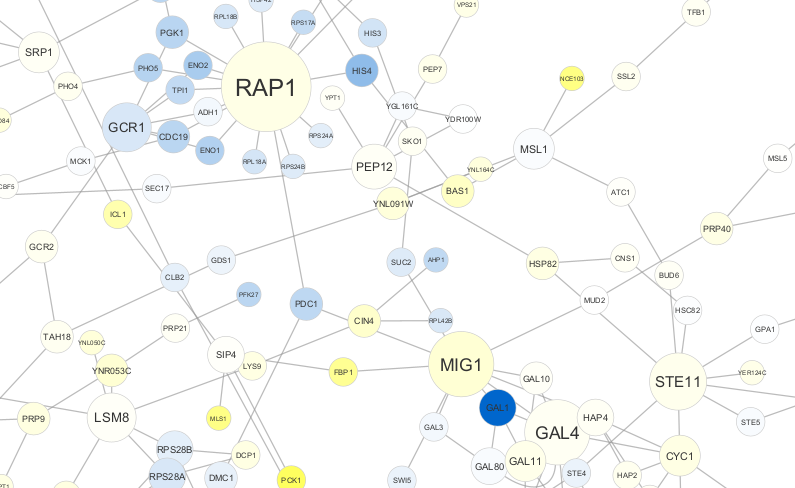

In [4]:
p4c.notebook_export_show_image()

# Set style and node color


First, lets change the style to a simple default and the color of nodes to grey:

In [5]:
p4c.set_visual_style('default')
p4c.set_node_color_default('#D8D8D8')

style_name not specified, so updating "default" style.


''

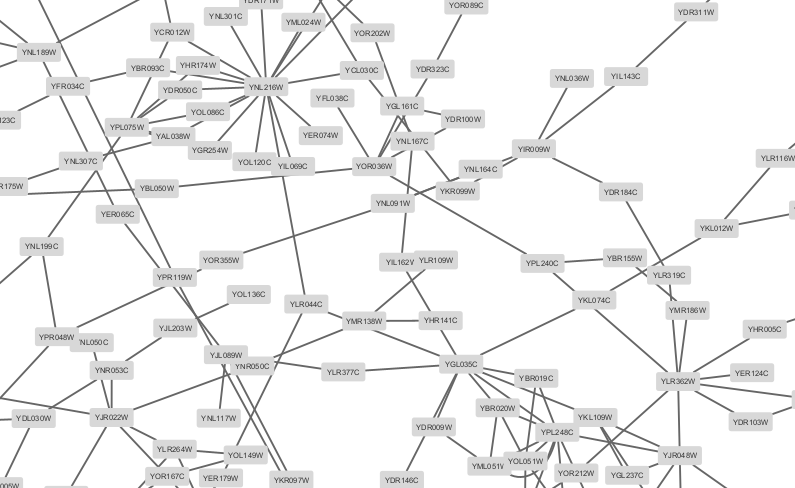

In [6]:
p4c.notebook_export_show_image()

# Custom Graphics

## Bar chart

In this example, we will create a bar chart with the three expression values, gal1RGexp, gal4RGexp and gal80Rexp, available as attributes in the session file.

Create the Custom Graphic:

In [7]:
p4c.set_node_custom_bar_chart(["gal1RGexp","gal4RGexp","gal80Rexp"])

style_name not specified, so updating "default" style.


''

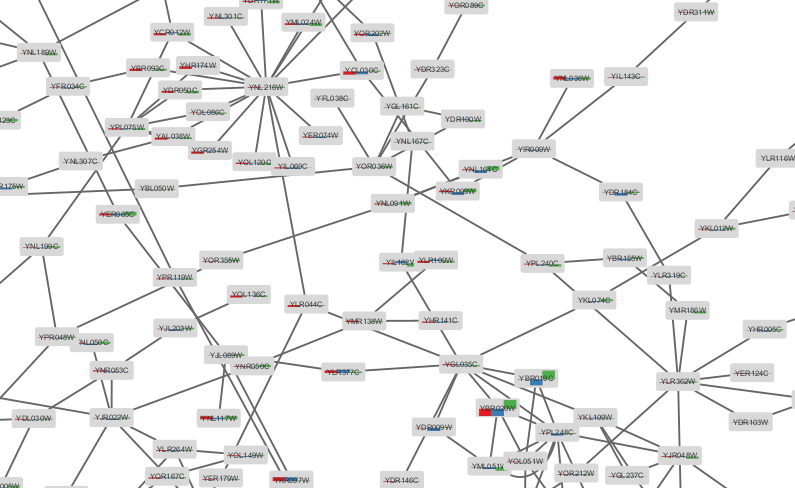

In [8]:
p4c.notebook_export_show_image()

There are 4 types of Bar Charts and customizable parameters for colors, size, spacing and orientation.

Position the Bar Chart just below the node. This is an optional step that we are doing here just to make room for subsequent graphics. By specifying both anchors at opposite ends, we can get a lot of space between the node and the graphic.

In [9]:
p4c.set_node_custom_position(node_anchor='S', graphic_anchor='N',justification='c')

style_name not specified, so updating "default" style.


''

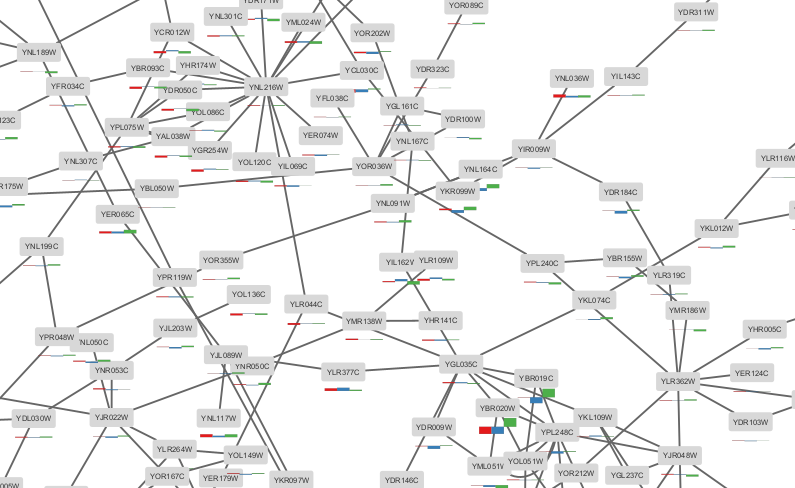

In [10]:
p4c.notebook_export_show_image()

# Stripes

Next we are going to create stripes of gradient mappings using a horizontal “heatmap”" of the same three data columns and position the heatmap right above the node. For this vignette, we need to also specify the slot number to avoid overwriting the Bar Chart:

In [11]:
p4c.set_node_custom_heat_map_chart(["gal1RGexp","gal4RGexp","gal80Rexp"], slot = 2)
p4c.set_node_custom_position(node_anchor='N', graphic_anchor='S', justification='c', slot = 2)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

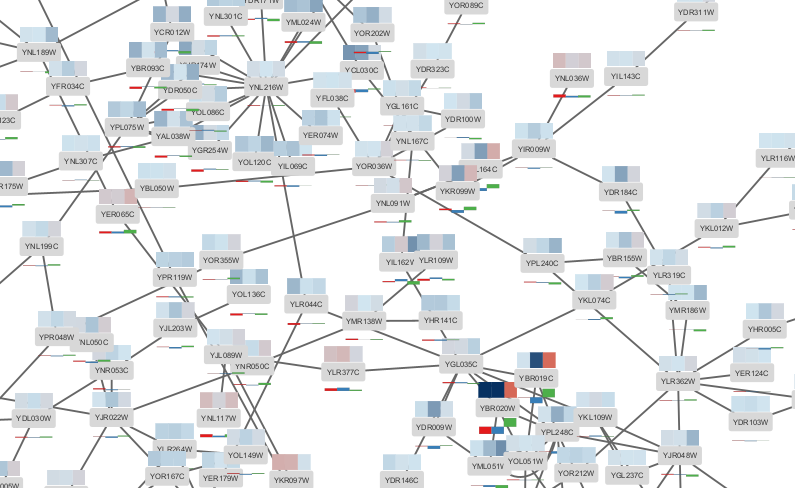

In [12]:
p4c.notebook_export_show_image()

# Pie chart

Finally, we will create a pie chart with two columns, Radiality and Degree, and place it to the left of the node. Here we’ll use the xOffset parameter to be even more specific about where we want to place the graphic relative to the node.

In [13]:
p4c.set_node_custom_pie_chart(['Radiality', 'Degree'], slot = 3)
p4c.set_node_custom_position(node_anchor='W', justification='c', x_offset = -20, slot = 3)

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

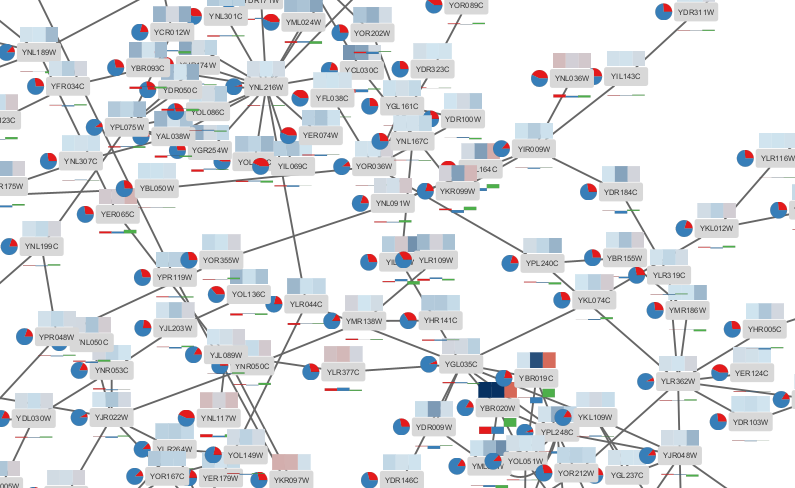

In [14]:
p4c.notebook_export_show_image()

# Enhanced Graphics


The nodes in the network are labeled with the corresponding protein names (yeast), but there is additional text information in the Node Table that could be useful to display as labels on the nodes. We are going to use the enhancedGraphics app to create a second node label for the common yeast gene name.

This involves a new step: Filling a new column with parameters for the enhancedGraphics App. This column is then mapped to a Custom Graphic slot and (optionally) positioned, like in the examples above.



# Install enhancedGraphics


The enhancedGraphics app is available from the Cytoscape App Store.

Install the enhancedGraphics app from http://apps.cytoscape.org/apps/enhancedgraphics

You can also install app inside Python notebook by running py4cytoscape.install_app('Your App')

# Define new label


The new column values have to follow a specific syntax to be recognized by the enhancedGraphics app. Here, for example, is how you set a label based on another attribute (e.g., the column called “COMMON”), specifying its size, color, outline and background:

"label: attribute=COMMON labelsize=10 color=red outline=false background=false""


For more details on the enhancedGraphics format, see the manual https://www.cgl.ucsf.edu/cytoscape/utilities3/enhancedcg.shtml.

First, we define a dataframe with two columns: node names (“name”) and the new label (“my second label”):



In [15]:
all_nodes = p4c.get_all_nodes()

In [17]:
label_df = pd.DataFrame(data=all_nodes, columns=['name'])

In [18]:
label_df

name
0    YBR072W
1    YGL073W
2    YBL069W
3    YNL189W
4    YDL236W
..       ...
325  YHR179W
326  YPL075W
327  YNL199C
328  YPR048W
329  YLR321C

[330 rows x 1 columns]

In [19]:
label_df["my second label"] = "label: attribute=COMMON labelsize=10 color=red outline=false background=false"

In [20]:
label_df

name                                    my second label
0    YBR072W  label: attribute=COMMON labelsize=10 color=red...
1    YGL073W  label: attribute=COMMON labelsize=10 color=red...
2    YBL069W  label: attribute=COMMON labelsize=10 color=red...
3    YNL189W  label: attribute=COMMON labelsize=10 color=red...
4    YDL236W  label: attribute=COMMON labelsize=10 color=red...
..       ...                                                ...
325  YHR179W  label: attribute=COMMON labelsize=10 color=red...
326  YPL075W  label: attribute=COMMON labelsize=10 color=red...
327  YNL199C  label: attribute=COMMON labelsize=10 color=red...
328  YPR048W  label: attribute=COMMON labelsize=10 color=red...
329  YLR321C  label: attribute=COMMON labelsize=10 color=red...

[330 rows x 2 columns]

Next, we load this dataframe into the Node Table to create and fill a new column:



In [21]:
p4c.load_table_data(label_df, data_key_column='name', table_key_column='name')

'Success: Data loaded in defaultnode table'

In [22]:
p4c.get_table_columns()

SUID shared name     name selected AverageShortestPathLength  \
513  513     YBR072W  YBR072W    False                 10.673387   
515  515     YGL073W  YGL073W    False                  9.677419   
517  517     YBL069W  YBL069W    False                  7.826613   
519  519     YNL189W  YNL189W    False                  7.822581   
521  521     YDL236W  YDL236W    False                  8.818548   
..   ...         ...      ...      ...                       ...   
503  503     YHR179W  YHR179W    False                       2.0   
505  505     YPL075W  YPL075W    False                  7.491935   
507  507     YNL199C  YNL199C    False                  7.870968   
509  509     YPR048W  YPR048W    False                  8.415323   
511  511     YLR321C  YLR321C    False                  8.120968   

    BetweennessCentrality ClosenessCentrality ClusteringCoefficient Degree  \
513                   0.0            0.093691                   0.0      1   
515              0.063324            0.103333                   0.0      5   
517                   0.0            0.127769                   0.0      1   
519              0.055933            0.127835                   0.0      5   
521                   0.0            0.113397                   0.0      1   
..                    ...                 ...                   ...    ...   
503                   0.0                 0.5                   0.0      1   
505              0.180023            0.133477                   0.0      7   
507              0.196921            0.127049                   0.0      3   
509              0.070836            0.118831                   0.0      3   
511              0.008065            0.123138                   0.0      2   

    Eccentricity  ... degree.layout COMMON gal1RGexp gal4RGexp gal80Rexp  \
513           21  ...             1  HSP26    -1.232     0.895    -0.447   
515           20  ...             5   HSF1     0.104    -0.084     0.543   
517           17  ...             1   AST1    -0.272    -0.487    -0.026   
519           16  ...             5   SRP1     0.082     0.014    -0.573   
521           17  ...             1  PHO13    -0.223    -0.311    -0.258   
..           ...  ...           ...    ...       ...       ...       ...   
503            3  ...             1   OYE2    -0.565     0.078    -0.671   
505           18  ...             7   GCR1    -0.373    -0.207     -0.53   
507           19  ...             3   GCR2     0.121    -0.162     0.433   
509           20  ...             3  TAH18     0.113    -0.191     0.289   
511           18  ...             2   SFH1     0.252    -0.352     0.427   

    gal1RGsig gal4RGsig gal80Rsig isExcludedFromPaths  \
513  0.000001  0.000024       0.0               False   
515  0.034847   0.42981  0.000623               False   
517  0.000002  0.000007   0.87354               False   
519  0.045195   0.79134       0.0               False   
521  0.000295  0.000054  0.000809               False   
..        ...       ...       ...                 ...   
503       0.0  0.098356       0.0               False   
505       0.0  0.046834  0.000005               False   
507  0.005054  0.007775  0.000057               False   
509   0.12893   0.54556  0.063048               False   
511  0.000027  0.000526  0.004705               False   

                                       my second label  
513  label: attribute=COMMON labelsize=10 color=red...  
515  label: attribute=COMMON labelsize=10 color=red...  
517  label: attribute=COMMON labelsize=10 color=red...  
519  label: attribute=COMMON labelsize=10 color=red...  
521  label: attribute=COMMON labelsize=10 color=red...  
..                                                 ...  
503  label: attribute=COMMON labelsize=10 color=red...  
505  label: attribute=COMMON labelsize=10 color=red...  
507  label: attribute=COMMON labelsize=10 color=red...  
509  label: attribute=COMMON labelsize=10 color=red...  
511  label: attribute=COM

# Map and position label


We now have a new column, my second label, that we can use for the mapping. This mapping does not come with a custom helper function, se we are going to use two alternative functions to prepare the passthrough mapping property and then update our visual style with the new mapping:



In [25]:
p4c.get_visual_property_names()

['COMPOUND_NODE_PADDING',
 'COMPOUND_NODE_SHAPE',
 'DING_RENDERING_ENGINE_ROOT',
 'EDGE',
 'EDGE_BEND',
 'EDGE_CURVED',
 'EDGE_LABEL',
 'EDGE_LABEL_COLOR',
 'EDGE_LABEL_FONT_FACE',
 'EDGE_LABEL_FONT_SIZE',
 'EDGE_LABEL_ROTATION',
 'EDGE_LABEL_TRANSPARENCY',
 'EDGE_LABEL_WIDTH',
 'EDGE_LINE_TYPE',
 'EDGE_PAINT',
 'EDGE_SELECTED',
 'EDGE_SELECTED_PAINT',
 'EDGE_SOURCE_ARROW_SELECTED_PAINT',
 'EDGE_SOURCE_ARROW_SHAPE',
 'EDGE_SOURCE_ARROW_SIZE',
 'EDGE_SOURCE_ARROW_UNSELECTED_PAINT',
 'EDGE_STACKING',
 'EDGE_STACKING_DENSITY',
 'EDGE_STROKE_SELECTED_PAINT',
 'EDGE_STROKE_UNSELECTED_PAINT',
 'EDGE_TARGET_ARROW_SELECTED_PAINT',
 'EDGE_TARGET_ARROW_SHAPE',
 'EDGE_TARGET_ARROW_SIZE',
 'EDGE_TARGET_ARROW_UNSELECTED_PAINT',
 'EDGE_TOOLTIP',
 'EDGE_TRANSPARENCY',
 'EDGE_UNSELECTED_PAINT',
 'EDGE_VISIBLE',
 'EDGE_WIDTH',
 'EDGE_Z_ORDER',
 'NETWORK',
 'NETWORK_ANNOTATION_SELECTION',
 'NETWORK_BACKGROUND_PAINT',
 'NETWORK_CENTER_X_LOCATION',
 'NETWORK_CENTER_Y_LOCATION',
 'NETWORK_CENTER_Z_LOCATION

In [29]:
label_map = p4c.map_visual_property('NODE_CUSTOMGRAPHICS_4', 'my second label', 'p')
p4c.update_style_mapping('default', label_map)

''

Note: the custom graphic slot number is actulally part of the property’s name.

Finally, we position the new label in the upper right corner:

In [30]:
p4c.set_node_custom_position(node_anchor='E', graphic_anchor='C', justification='r' , x_offset = 40,  slot = 4)

style_name not specified, so updating "default" style.


''

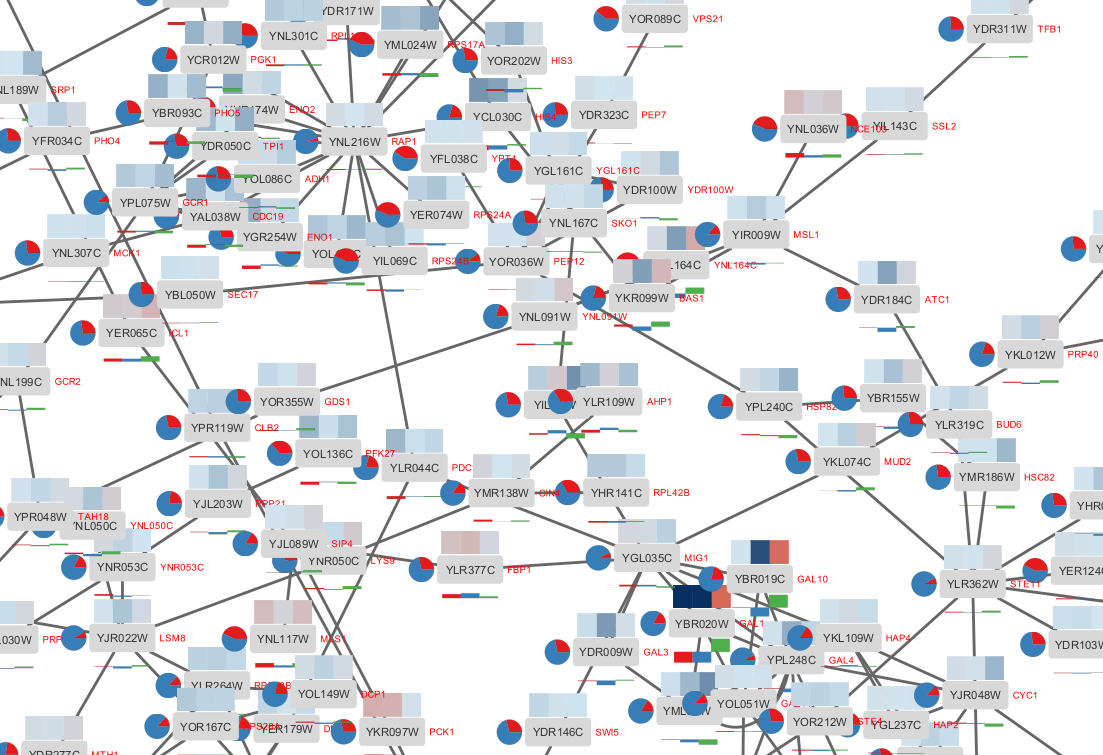

In [31]:
p4c.notebook_export_show_image()